<a href="https://www.kaggle.com/code/omarkhaledabdelraouf/bellabeat-data-analysis?scriptVersionId=99598866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women.

# The Scenario
Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has
asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain
insight into how people are already using their smart devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

# Business task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Data sources used
[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

# Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datasets

In [2]:
dailyActivity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepDay = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weightInfo = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
hourlyIntensities = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourlyCalories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourlySteps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

# Explore Data

In [3]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
hourlyIntensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [7]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [8]:
hourlyIntensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [9]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [10]:
hourlySteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [11]:
hourlyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [12]:
hourlySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [13]:
hourlyCalories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [14]:
hourlySteps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [15]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [16]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [17]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [18]:
weightInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [19]:
weightInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [20]:
weightInfo.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [21]:
dailyActivity.Id.nunique()

33

In [22]:
sleepDay.Id.nunique()

24

In [23]:
hourlySteps.Id.nunique()

33

In [24]:
hourlyCalories.Id.nunique()

33

In [25]:
weightInfo.Id.nunique()

8

**This information tells us the number of participants in each dataset**

We found that all **33** participants share their data. <br>
and 24 particiopants share their sleepDay data and only 8 participants share information about their weight.

So we can exclude weightInfo data from our analysis because 8 participants is not significant to make any recommendations and conclusions based on this data.

# Fixing format and merging data

 I will merge this two dataset because it will give me some insights i can explore.

In [26]:
hourlyStepsAndCalories_merged = pd.merge(hourlySteps , hourlyCalories , on = ['Id','ActivityHour'])

In [27]:
hourlyStepsAndCalories_merged.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,81
1,1503960366,4/12/2016 1:00:00 AM,160,61
2,1503960366,4/12/2016 2:00:00 AM,151,59
3,1503960366,4/12/2016 3:00:00 AM,0,47
4,1503960366,4/12/2016 4:00:00 AM,0,48


In [28]:
hourlyStepsAndCalories_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
 3   Calories      22099 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 863.2+ KB




I founded some problems with timestamp in more than one data so i will fix it.

In [29]:
hourlyStepsAndCalories_merged['date'] = pd.to_datetime(hourlyStepsAndCalories_merged['ActivityHour']).dt.date
hourlyStepsAndCalories_merged['Time'] = pd.to_datetime(hourlyStepsAndCalories_merged['ActivityHour']).dt.strftime('%I:%M:%S %p')
hourlyStepsAndCalories_merged.drop('ActivityHour', inplace=True, axis=1)

In [30]:
hourlyStepsAndCalories_merged.head()

,Id,StepTotal,Calories,date,Time
0,1503960366,373,81,2016-04-12,12:00:00 AM
1,1503960366,160,61,2016-04-12,01:00:00 AM
2,1503960366,151,59,2016-04-12,02:00:00 AM
3,1503960366,0,47,2016-04-12,03:00:00 AM
4,1503960366,0,48,2016-04-12,04:00:00 AM


In [31]:
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay']).dt.date

In [32]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [33]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate']).dt.date

In [34]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


I need to work on **BigQuery** on google cloud so i downloaded this two dataframes to explore it more.

In [35]:
hourlyStepsAndCalories_merged.to_csv('hourlyStepsAndCalories_merged.csv',index=False)

In [36]:
sleepDay.to_csv('sleepDay.csv',index=False)

I did some SQL Queries in BigQuery to merge some tables and find Total usage time or Total time the participant wearing the bellabeat

In [37]:
TotalUsage = pd.read_csv('../input/totalusagecsv/bq-results-20220619-011746-1655601599326.csv')

In [38]:
TotalUsage.head()

,Id,Date,TotalUsageTime
0,1503960366,2016-04-12,1113
1,1503960366,2016-04-15,1028
2,1503960366,2016-04-17,773
3,1503960366,2016-04-19,1136
4,1503960366,2016-04-20,1080


In [39]:
TotalUsage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              413 non-null    int64 
 1   Date            413 non-null    object
 2   TotalUsageTime  413 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [40]:
TotalUsage.describe()

,Id,TotalUsageTime
count,4.130000e+02,413.000000
mean,5.000979e+09,1011.423729
std,2.060360e+09,163.608466
min,1.503960e+09,21.000000
25%,3.977334e+09,948.000000
50%,4.702922e+09,1019.000000
75%,6.962181e+09,1086.000000
max,8.792010e+09,1416.000000


# What i found 


* We found that average steps per day is **7637 steps** which is need to be at least **10,000 steps** per day on average. <br>


**Why 10,000 steps?**<br>
Regardless of the fitness wearable you purchase, **10,000 steps** are likely the magical number that will be preprogrammed into your device. But why **10,000 steps**?

Well, when you do the math, **10,000 steps** works out to approximately five miles. That’s a number said to help reduce certain health conditions, such as high blood pressure and heart disease.
https://www.healthline.com/health/how-many-steps-a-day

* It's so wierd to have 4 Different participants have **0 Calories** and the device recorded **1440 SedentaryMinutes**. <br>
I think we can consider **that BellaBeat data is not 100% accurate**.

* The Average SedentaryMinutes is **991 minutes** or **16 hours** which indicate the user wear the bellabeat even Even if he does not do any activity.
> According to the World Health Organization (WHO), a person is said to lead a sedentary lifestyle if most of their time is spent doing only basic activities like sitting, standing, reading, working on the laptop, housework, and maybe a **30-minute walk**.
* I think people wear the bellabeat most of the day as a fashion not only health device.

* The Total minutes per day is **1440 minutes** and the Average usage time per day or Average time wearing bellabeat per day is **1011 minutes**. <br>
which indicate that particpants love wearing the bellabeat all the day and They feel comfortable wearing it and there are no problems in wearing it.

* The average minutes sleep per day is **419 minutes** which mean **7 hours** and this is good for being healthy person. <br>
But approximatly **10 % of participants** sleept more than **9 hours** and this is not healthy sleep.

* Most of activity time for participants is considered Lightly Active ( **192 minutes** or **3.2 hours** ).<br>

> Light exercise includes activities that do not cause you to break a sweat or produce shortness of breath. An example would be a leisurely walk or casual bike ride. Moderate exercise is exercise which causes you to break out in a light to moderate sweat or makes it difficult to carry on a long conversation. Good examples would be a
brisk walk, hiking on a nature trail, performing chores around the house. Heavy exercise causes you to sweat profusely and makes it difficult to carry on a conversation of any length. Some examples would be running around a track, heavy manual labor, or heavy weightlifting.

# Visualize data to make sure of our finds and explore it more

Text(0, 0.5, 'Total Steps')

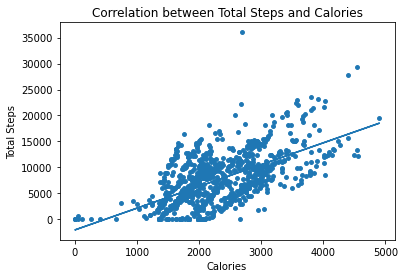

In [41]:
plt.scatter(dailyActivity['Calories'],dailyActivity['TotalSteps'] , s = 15)
#calculate equation for the line
z = np.polyfit(dailyActivity['Calories'], dailyActivity['TotalSteps'], 1)
p = np.poly1d(z)

#add line to plot
plt.plot(dailyActivity['Calories'], p(dailyActivity['Calories']))
plt.title('Correlation between Total Steps and Calories')
plt.xlabel('Calories')
plt.ylabel('Total Steps')

Here we can see a positive correlation between Total Steps and Calories that's mean the more active we are the more Calories we burn.

Text(0, 0.5, 'Time in minutes')

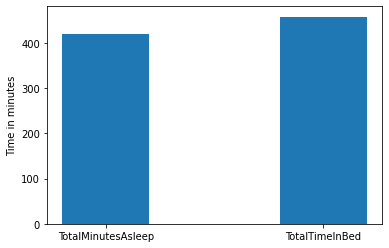

In [42]:
data = {'TotalMinutesAsleep': sleepDay['TotalMinutesAsleep'].mean() ,
        
        'TotalTimeInBed': sleepDay['TotalTimeInBed'].mean()
        
       }

keys = list(data.keys())
values = list(data.values())
plt.bar(keys,values , width = 0.4)
plt.ylabel("Time in minutes")

In [43]:
(sleepDay['TotalTimeInBed'] - sleepDay['TotalMinutesAsleep']).mean()

39.171912832929785

The average time participants lying on the bed without sleep is **39 minutes**, This number should be reduced for better sleeping.

# Final conclusion based on my analysis

First of all let's remember the business task again.
> Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage

### How Can a Wellness Technology Company Play It Smart?

* We found that average steps per day is **7637 steps** which is need to be at least **10,000 steps** per day on average.<br>
So we can make a target or goal in bellabeat app to achive 10,000 steps perday
and use this to market the product 

* Average SedentaryMinutes is **991 minutes** or **16 hours** which indicate the user wear the bellabeat even Even if he does not do any activity. <br>
People wear the bellabeat most of the day as a fashion not only health device. <br>
So we can improve the design of bellabeat and say that people love to wear our product as a part of their outfit.

* The Total minutes per day is **1440 minutes** and the Average usage time per day or Average time wearing bellabeat per day is 1011 minutes.<br>
Particpants love wearing the bellabeat all the day and They feel comfortable wearing it and there are no problems in wearing it. <br>
We can use it to say that our product is so easy and comfortable to wear.

* The average minutes sleep per day is **419 minutes** which mean **7 hours** and this is good for being healthy person. <br>
We can use it to market that our product help you improve your sleep and improve your healthy
and most of out client sleep only **7 hours** and you can do it if you have and problem with sleeping and manage your time.